In [10]:
#Compress original to small size and gray type
#to improve later operation speed
from PIL import Image
import os
from os import listdir
from os.path import isdir, join
from datetime import datetime
begin = datetime.now()
root = r'D:\DL_data\origin'
root_resized = r'C:\DL_data\dp1_thumbnail'

assetTypes=['A', 'B','C1','C2','C3','C4','C5']
file_indexes = {}
for t in assetTypes:
    date_indexes = {}
    for date in ['1016', '1017', '1018']:
        date_indexes[date] = 1
    file_indexes[t] = date_indexes

def process_image(image_file):
    im = Image.open(image_file)
    #im = im.convert('L')    
    #x, y = im.size
    #if (y > x):
    #    im = im.rotate(90, expand=True)        
    x, y = im.size
    newsize=512
    if (y > x):
        resize_x = newsize
        resize_y = newsize * y / x
    else:
        resize_y = newsize
        resize_x = newsize * x / y
    im.thumbnail((resize_x, resize_y), Image.ANTIALIAS)    
    #target_x = 224
    #target_y = 168
    #new_size = (resize_x/2 - target_x/2, resize_y/2 - target_y/2, resize_x/2 + target_x/2, resize_y/2 + target_y/2)
    #im = im.crop(new_size)    
    return im

# types = [f for f in listdir(root) if isdir(join(root, f))]
for t in assetTypes:
    print(t)
    type_folder = join(root, t)
    users = [f for f in listdir(type_folder) if isdir(join(type_folder, f))]
    for user in users:
        print(user)
        user_folder = join(type_folder, user)
        onoffs = [f for f in listdir(user_folder) if isdir(join(user_folder, f))]
        for onoff in onoffs:
            onoff_folder = join(user_folder, onoff)
            with os.scandir(onoff_folder) as pictures:
                for picture in pictures:                      
                    stat = picture.stat()
                    date = datetime.fromtimestamp(stat.st_mtime)
                    if not picture.name.endswith('.jpg'):
                        continue
                    im = process_image(join(onoff_folder, picture.name))
                    dateString = "%2d%2d"%(date.month, date.day)
                    index = file_indexes[t][dateString]
                    im.save(join(root_resized, "%s_%s_%s_%s_%05d.jpg"%(t,onoff,dateString,user,  index)), "JPEG")
                    file_indexes[t][dateString] = index + 1
                    print('.', end='')
        print('')
                    
elapse = datetime.now() - begin
print(elapse)

A
cn569306
...............................................................................................................................................................................................jianji01
.................................................................................................................................................................................................mingfang
......................................................................................................................................................................................................mingmyao
......................................................................................................................................................pengzh01
................................................................................................................................................................xinchen
xiongan2
............................................

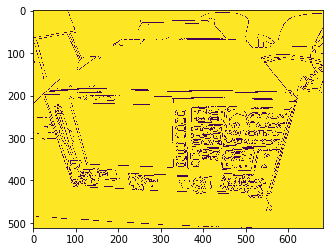

In [81]:
#Example of image to profile
import cv2 as cv

import matplotlib.pyplot as plt

sample=r'C:\DL_Data\dp1_thumbnail\A_off_1016_cn569306_00001.jpg'
result=r'C:\DL_Data\A_off_1016_cn569306_00001_profile.jpg'
#sample=r'C:\DL_Data\IMG_20181016_151241_1.jpg'

def displayImages(list):
    imgRow=1
    imgCol=len(list)
    f = plt.figure()
    for i in range(1,imgCol):
        f.add_subplot(imgRow,imgCol,i)
        plt.imshow(list[i])
    plt.show()
    
def saveToProfileImg(fromPath,toPath):
    imgOrg=cv.imread(fromPath)
    imgGray=cv.cvtColor(imgOrg, cv.COLOR_BGR2GRAY)
    imgBlur=cv.GaussianBlur(imgGray,(5,5),0)
    imgEdge=cv.Canny(imgBlur,1,80)
    
    th=100
    ret,imgBin=cv.threshold(imgEdge,th,255,cv.THRESH_BINARY_INV)
    
    cv.imwrite(toPath,imgBin)
    
    return imgBin    

img=saveToProfileImg(sample,result)

#im = Image.open(imgBin)
#img=im.rotate(90, expand=True)  
imshow(img)


In [88]:
#all images to profile
from datetime import datetime
import os
from os.path import isdir, join

begin = datetime.now()
root = r'C:\DL_data\dp1_thumbnail'
root_processed = r'C:\DL_data\dp2_profile'

with os.scandir(root) as pictures:
    for picture in pictures:               
        if not picture.name.endswith('.jpg'):
            continue
        srcPath=join(root, picture.name)
        destPath=join(root_processed,picture.name)
        im = saveToProfileImg(srcPath,destPath)

elapse = datetime.now() - begin
print(elapse)

TypeError: object of type 'nt.ScandirIterator' has no len()

In [139]:
 #adjust size or shape
#from IPython.display import clear_output
from datetime import datetime
import os
from os.path import isdir, join
imgSize=200

begin = datetime.now()
root = r'C:\DL_data\dp2_profile'
root_processed = r'C:\DL_data\dp3_resized'

def adjustSize(srcPath,dstPath,size):
    im = Image.open(srcPath)
    x, y = im.size
    if (y > x): 
        resize_y = size
        resize_x = size * x / y
    else:
        resize_x = size
        resize_y = size * y / x
        
    im.thumbnail((resize_x, resize_y), Image.ANTIALIAS)    
    im.save(dstPath)
    
    return

with os.scandir(root) as pictures:
    for picture in pictures: 
               
        if not picture.name.endswith('.jpg'):
            continue
        srcPath=join(root, picture.name)
        destPath=join(root_processed,picture.name)
        adjustSize(srcPath,destPath,imgSize)
    
    
elapse = datetime.now() - begin
print(elapse)

0:01:20.945501


In [8]:
#split data set into training and test
import os
from os import listdir
from os.path import isdir, join
from datetime import datetime
import random
from random import randint

import shutil

begin = datetime.now()
src_folder = r'C:\DL_Data\dp3_resized'
training_folder = r'C:\DL_Data\dp9_train'
test_folder = r'C:\DL_Data\dp9_test'

def create_folder(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)
        
def classify_image_files(nameList, idx, src,dst):
    create_folder(dst)
    for i in idx:
        source_file = join(src, nameList[i])
        destination_file = join(dst, nameList[i])
        shutil.copyfile(source_file, destination_file)        
        
files={}
for asset in ['A', 'B','C']:     
    files[asset]=[]

for f in listdir(src_folder):
    for asset in ['A', 'B','C']:         
        if f.startswith(asset): files[asset].append(f)

for asset in ['A', 'B','C']: 
    print('Count of ',asset,':',len(files[asset]),end='')
    idx=list(range(1,1401))
    random.shuffle(idx)
    classify_image_files(files[asset],idx[:1200], src_folder,training_folder)
    classify_image_files(files[asset],idx[1201:1401], src_folder,test_folder)
    print(', 1200 for training, 200 for testing.')

        
elapse = datetime.now() - begin
print('job done!',elapse)

Count of  A : 1438, 1200 for training, 200 for testing.
Count of  B : 1460, 1200 for training, 200 for testing.
Count of  C : 1893, 1200 for training, 200 for testing.
job done! 0:00:26.318758


In [42]:
#load to numpy array
from PIL import Image
import numpy as np
from datetime import datetime
import os
from os import listdir
from os.path import isdir, join

begin = datetime.now()
#processed_folder = r'C:\Zdata\DL pictures\Processed'
training_folder = r'C:\DL_Data\dp9_train'
test_folder = r'C:\DL_Data\dp9_test'

imgSize=200

def load_data(data_folder):
    image_list = []
    label_list = []
    cnt=0
    with os.scandir(data_folder) as image_files:
        for image_file in image_files:                      
            if not image_file.name.endswith('.jpg'):
                continue
            image_array = np.ndarray((imgSize, imgSize))
            image = Image.open(join(data_folder, image_file.name))
            width, height = image.size
            for y in range(imgSize):
                for x in range(imgSize):
                    if x>=width or y>=height:
                        image_array[y][x] =0 #0=white, no data
                    else:
                        image_array[y][x] =255-image.getpixel((x,y))
                    
            image_list.append(image_array)
            category = image_file.name[:1]
            label=0
            if category == 'A':label=1
            if category == 'B':label=2
            if category == 'C':label=0
            label_list.append(label)
            #print(label)
            cnt=cnt+1
            if(cnt==100):
                print('>',end='')
                cnt=0
            #label_list.append([0 if category == 'A' else 1, 0 if category == 'B' else 1])
        print('')
            
    images = np.array(image_list, np.int32)
    labels = np.array(label_list, np.int32)
    return images, labels

print('time elapsed:',datetime.now() - begin)
print('loading test data')
test_images, test_labels = load_data(test_folder)
print(test_images.shape)
print(test_labels.shape)

test_images = test_images / 255.0
print(test_images[0])

print('time elapsed:',datetime.now() - begin)
print('loading training data')
training_images, training_labels = load_data(training_folder)
print(training_images.shape)
print(training_labels.shape)

training_images = training_images / 255.0
print(training_images[0])



print('time elapsed:',datetime.now() - begin)

time elapsed: 0:00:00.009010
loading test data
>>>>>
(597, 200, 200)
(597,)
[[0.         0.         0.         ... 0.03921569 0.34509804 0.27058824]
 [0.         0.         0.         ... 0.07058824 0.34901961 0.25882353]
 [0.         0.         0.         ... 0.11372549 0.3372549  0.22745098]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
time elapsed: 0:00:23.464562
loading training data
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
(3600, 200, 200)
(3600,)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.00784314 0.01176471 0.01568627]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.       

In [43]:
#save array to file
file_train_image=r'C:\DL_Data\data\train_image'
file_train_label=r'C:\DL_Data\data\train_label'
file_test_image=r'C:\DL_Data\data\test_image'
file_test_label=r'C:\DL_Data\data\test_label'
np.save(file_train_image,training_images)
np.save(file_train_label,training_labels)
np.save(file_test_image,test_images)
np.save(file_test_label,test_labels)

print('save done')

save done


In [6]:
#load array from file
#after a browser restart
import numpy as np
file_train_image=r'C:\DL_Data\data\train_image.npy'
file_train_label=r'C:\DL_Data\data\train_label.npy'
file_test_image=r'C:\DL_Data\data\test_image.npy'
file_test_label=r'C:\DL_Data\data\test_label.npy'

training_images=np.load(file_train_image)
training_labels=np.load(file_train_label)
test_images=np.load(file_test_image)
test_labels=np.load(file_test_label)

print('load done')

load done


In [44]:
#model using keras
import keras
keras.__version__
import numpy as np

(200, 200) (3600,) <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
label= 2 , index= 2000


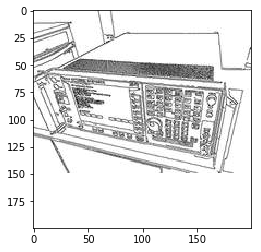

In [45]:

print(np.shape(training_images[0]), np.shape(training_labels), type(training_images))
print(type(training_labels), type(training_images[0]))

idx=2000
print('label=',training_labels[idx],', index=',idx)
digit = training_images[idx]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()


In [46]:
#prepare the data
print(training_images.shape, training_labels.shape)
print(test_images.shape, test_labels.shape)

(3600, 200, 200) (3600,)
(597, 200, 200) (597,)


In [47]:
#configuration
train_count=3600
test_count=597
input_shape=200*200
output_possibility=3

In [48]:
#transform data
from keras.utils import to_categorical

train_img_serial = training_images.reshape((train_count, input_shape))
train_img_serial = train_img_serial.astype('float32') / 255

test_img_serial = test_images.reshape((test_count, input_shape))
test_img_serial = test_img_serial.astype('float32') / 255

train_lbl_cate = to_categorical(training_labels)
test_lbl_cate = to_categorical(test_labels)

print(train_img_serial.shape, train_lbl_cate.shape)
print(test_img_serial.shape, test_lbl_cate.shape)

(3600, 40000) (3600, 3)
(597, 40000) (597, 3)


In [53]:
# layers

from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(input_shape,)))
network.add(layers.Dense(output_possibility, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [54]:
#start training
history=network.fit(train_img_serial, train_lbl_cate, epochs=12, batch_size=128)

Epoch 1/12
3600/3600 [==============================] - 25s 7ms/step - loss: 1.0560 - acc: 0.4533
Epoch 2/12
3600/3600 [==============================] - 22s 6ms/step - loss: 0.9621 - acc: 0.5872
Epoch 3/12
3600/3600 [==============================] - 24s 7ms/step - loss: 0.8864 - acc: 0.6278
Epoch 4/12
3600/3600 [==============================] - 26s 7ms/step - loss: 0.8243 - acc: 0.6642
Epoch 5/12
3600/3600 [==============================] - 22s 6ms/step - loss: 0.7707 - acc: 0.6900
Epoch 6/12
3600/3600 [==============================] - 21s 6ms/step - loss: 0.7250 - acc: 0.7161
Epoch 7/12
3600/3600 [==============================] - 22s 6ms/step - loss: 0.6854 - acc: 0.7319
Epoch 8/12
3600/3600 [==============================] - 22s 6ms/step - loss: 0.6436 - acc: 0.7581
Epoch 9/12
3600/3600 [==============================] - 21s 6ms/step - loss: 0.6108 - acc: 0.7814
Epoch 10/12
3600/3600 [==============================] - 22s 6ms/step - loss: 0.5735 - acc: 0.7936
Epoch 11/12
3600/36

In [55]:
test_loss, test_acc = network.evaluate(test_img_serial, test_lbl_cate)
print('test_acc:', test_acc)

597/597 [==============================] - 2s 3ms/step
test_acc: 0.6616415419370885


In [56]:
network.save("mnist.h5")
